In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import copy

# Adding library directory to python search path
import sys
import git
repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

# Create directory for generated .tex and .pdf
if not os.path.exists('gen'):
    os.mkdir('gen')

In [109]:
class consts:
    pi = 3.141592
    c  = 3 * 10**8 # m/s
    mu_0 = 4 * pi * 10**-7 # N * A^-2
    e = 1.6 * 10**-19 # C

    k = 1.38 * 10**-23 # J/K

class cgs:
    k = 1.38 * 10**-16 # erg/K
    e = 4.8 * 10**-10 # Franklin

class setup:
    dummy = 0

    d = 0.2 # mm
    l = 5.2 # mm
    S = d * l * consts.pi # mm^2

    U_lighting = 2140 # V

    A1_div = 15 / 150 # mA / div
    err_A1 = 0.002 * 15 # mA
    m_i = 22 * 1.66 * 10**-27 # kg

    def U_real(x):
        return x * 10
    

In [110]:
def sort_pairs(x, y, index):
    tup = list(zip(x, y))
    tup.sort(key = lambda x: x[index])

    untup = list(zip(*tup))

    return untup[0], untup[1]

In [111]:
data = mipt.read_excel('data/351.ods', usecols=('A', 'B'), header=(0)).dropna()

xsl = {
    "U_p, V" : "U",
    "I_p, div" : "I_div"
}

data = mipt.map_excel(data, xsl)

I = data['I_div'] * setup.A1_div
data.insert(2, 'I', I)
data

,U,I_div,I
0,30.85,22.0,2.20
1,30.55,25.0,2.50
2,30.16,31.0,3.10
3,30.32,35.0,3.50
4,30.37,40.0,4.00
5,30.43,46.5,4.65
6,30.43,50.0,5.00
7,30.54,45.0,4.50
8,30.51,40.0,4.00
9,30.42,35.0,3.50


R_diff = (-44789.680 +- 0.000) Ом


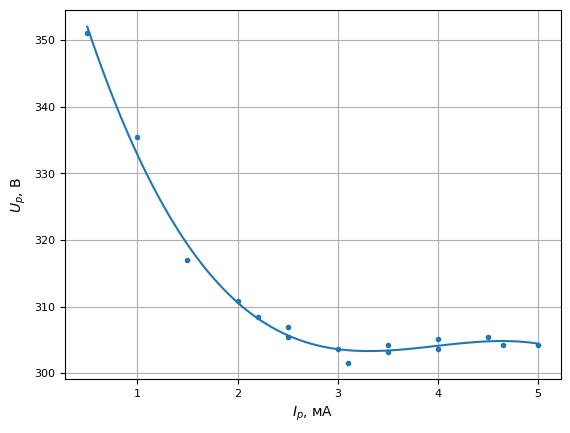

In [112]:
def interp(x, y):
    return UnivariateSpline(x, y, s=100)

def deriv(x, y):
    return UnivariateSpline(x, y, s=100).derivative()

x, y = sort_pairs(data['I'], setup.U_real(data['U']), 0)
mipt.plot(x, y, func=interp)

max_der = deriv(x, y)(min(x))
print("R_diff = ({:.3f} +- {:.3f}) Ом".format(max_der * 10**3, 0))

plt.ylabel(r"$U_p$, В")
plt.xlabel(r"$I_p$, мА")
plt.grid(True)

# plt.legend()
plt.savefig("gen/U_p_I_p.pdf")

In [113]:
data = mipt.read_excel('data/351.ods', usecols=('E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'O', 'P', 'Q', 'R'), header=(0, 1)).dropna()

xsl = {
    "I=5 mA" : "5",
    "I=3 mA" : "3",
    "I=1.5 mA" : "1.5",

    "U_z, V" : "U_pos",
    "U_z_neg, V" : "U_neg",
    "I_z, mkA" : "I_pos",
    "I_z_neg, mkA" : "I_neg"
}

data = mipt.map_excel(data, xsl)
data

5                               3                           1.5  \
     U_pos   I_pos   U_neg   I_neg   U_pos  I_pos   U_neg  I_neg   U_pos   
0   25.031  120.13  25.002  107.63  31.535  80.53  31.536  69.97  31.538   
1   22.015  123.05  22.008  110.71  30.062  79.55  30.034  69.02  30.025   
2   19.007  120.99  19.027  109.00  26.954  77.22  26.989  66.93  27.018   
3   16.001  117.27  16.016  105.22  25.093  75.84  25.015  65.64  25.033   
4   13.019  109.70  13.005   98.00  21.975  73.53  22.001  63.68  22.057   
5   10.038   96.79  10.043   85.11  19.040  71.39  19.039  61.72  18.970   
6    8.005   84.11   8.047   72.50  16.050  68.97  16.007  59.51  16.026   
7    5.996   67.74   6.002   55.78  13.028  65.39  13.011  56.19  13.010   
8    4.016   47.61   4.020   35.26   9.981  58.99  10.087  50.38  10.051   
9    2.010   24.39   2.026   11.90   8.021  52.52   7.992  43.69   8.084   
10   0.502    5.67   0.505   -7.26   6.015  43.44   6.023  34.90   6.026   
11  31.535  129.29  31.534  114.69   4.056  32.10   4.082  23.73   4.023   
12  29.990  132.96  30.008  119.45   1.973  17.63   2.002   9.50   1.993   
13  27.040  130.92  27.014  116.13   0.498   6.42   0.508  -1.92   0.520   

                          
    I_pos   U_neg  I_neg  
0   42.65  31.540  36.06  
1   41.97  30.030  35.38  
2   40.56  26.999  34.22  
3   39.69  24.999  33.46  
4   38.35  21.016  31.97  
5   36.99  18.996  31.20  
6   35.66  16.029  30.03  
7   33.92  13.044  28.51  
8   31.09  10.042  25.91  
9   28.02   8.021  22.91  
10  23.53   6.036  18.67  
11  17.57   4.048  12.94  
12  10.14   1.979   5.48  
13   4.03   0.505  -0.50

1.5
	I_n = 25.9 mkA
	dI/dU(0) = 3.61 mkA/V
	left  dU = -7.18 V
	right dU = 7.17 V
	kT_e (I_n) = 3.59 eV
	kT_e (dU) = 3.59 eV
	T_e = 4.23e+04 K
	n_e = 2.19e+16 1/m^3
	omega_p = 8.29e+09 rad/s
	r_de = 0.00679 cm
	r_d = 0.000571 cm
	N_d = 17.1
	n = 6.36e+22 1/m^3
	alpha = 3.45e-07

3
	I_n = 53.2 mkA
	dI/dU(0) = 6.62 mkA/V
	left  dU = -8.03 V
	right dU = 8.04 V
	kT_e (I_n) = 4.02 eV
	kT_e (dU) = 4.02 eV
	T_e = 4.74e+04 K
	n_e = 4.25e+16 1/m^3
	omega_p = 1.15e+10 rad/s
	r_de = 0.00515 cm
	r_d = 0.00041 cm
	N_d = 12.3
	n = 6.36e+22 1/m^3
	alpha = 6.69e-07

5
	I_n = 94.8 mkA
	dI/dU(0) = 10.2 mkA/V
	left  dU = -9.58 V
	right dU = 9.1 V
	kT_e (I_n) = 4.67 eV
	kT_e (dU) = 4.67 eV
	T_e = 5.51e+04 K
	n_e = 7.03e+16 1/m^3
	omega_p = 1.48e+10 rad/s
	r_de = 0.00432 cm
	r_d = 0.000319 cm
	N_d = 9.55
	n = 6.36e+22 1/m^3
	alpha = 1.11e-06



,I_p,kT_e,n_e,omega_p,r_de,r_d,N_d,alpha
0,1.5,3.588937,2.189843e+10,8.286946e+09,0.006789,0.000571,17.111938,3.445061e-07
1,3.0,4.015897,4.251026e+10,1.154609e+10,0.005154,0.000410,12.281708,6.687715e-07
2,5.0,4.670910,7.027764e+10,1.484556e+10,0.004323,0.000319,9.552061,1.105608e-06


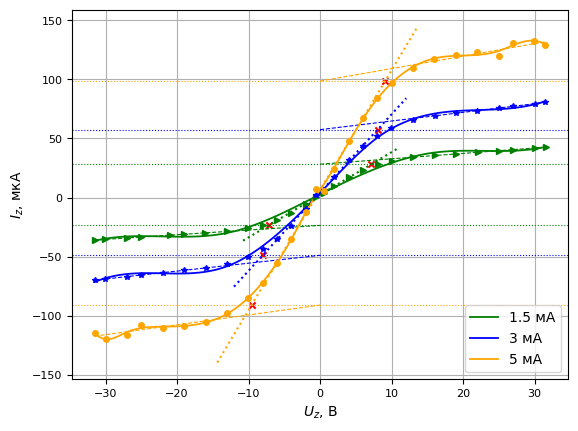

In [128]:
from scipy import interpolate
import sympy as sp

# def interp(x, y):
#     return interpolate.interp1d(x, y, 'cubic')
def interp(x, y):
    return UnivariateSpline(x, y, s=100)

arr_T_e = []
arr_n_e = []
arr_I_p = []

lists = {
    'I_p' : [],
    'kT_e' : [],
    'n_e' : [],
    'omega_p' : [],
    'r_de' : [],
    'r_d' : [],
    'N_d' : [],
    'alpha' : []
}

def plot_zond(index, color, left, right, begin, end):
    x = np.concatenate((data[index, 'U_pos'], -data[index, 'U_neg']))
    y = np.concatenate((data[index, 'I_pos'], -data[index, 'I_neg']))

    lists['I_p'].append(float(index))
    print(index)

    x, y = sort_pairs(x, y, 0)
    
    mipt.plot(x, y, func=interp, color=color, label=index + " мА", unique_marker=True, marker_size=4, linewidth=1.3)
    
    # Asymptotes
    data_asl = [x[0:left], y[0:left]]
    data_asr = [x[len(x) - right:len(x)], y[len(y) - right:len(y)]]

    asl = mipt.interp_linear(data_asl[0], data_asl[1])
    asr = mipt.interp_linear(data_asr[0], data_asr[1])
    
    mipt.plot(data_asl[0], data_asl[1],
              color=color, linestyle='dashed', x_min=min(x), x_max=0, linewidth = 0.8, unique_marker=' ')

    mipt.plot(data_asr[0], data_asr[1],
              color=color, linestyle='dashed', x_min=0, x_max=max(x), linewidth = 0.8, unique_marker=' ')

    I_n = np.average([-asl(0), asr(0)])
    print("\tI_n = {:.3} mkA".format(I_n))

    # Tangent
    begin += len(x)//2
    end   += len(x)//2

    data_tan = [x[begin:end], y[begin:end]]
    tan = mipt.interp_linear(data_tan[0], data_tan[1])

    dI_dU = (tan(1) - tan(0)) / 1
    print("\tdI/dU(0) = {:.3} mkA/V".format(dI_dU))

    # Intersection
    line_tan = sp.Line((0, tan(0)), (1, tan(1)))
    line_Il = sp.Line((0, asl(0)), (1, asl(0)))
    line_Ir = sp.Line((0, asr(0)), (1, asr(0)))

    inter_l = line_tan.intersection(line_Il)[0]
    inter_r = line_tan.intersection(line_Ir)[0]

    dU_l = float(inter_l.x)
    dU_r = float(inter_r.x)
    print("\tleft  dU = {:.3} V".format(dU_l))
    print("\tright dU = {:.3} V".format(dU_r))

    # Tangent
    mipt.plot(data_tan[0], data_tan[1], color=color, linestyle='dotted', unique_marker=' ',
              x_min=1.5 * float(inter_l.x), x_max=1.5 * float(inter_r.x))

    # Horizontal on I_n
    plt.axhline(y=asl(0), color=color, linewidth=0.8, linestyle='dotted')
    plt.axhline(y=asr(0), color=color, linewidth=0.8, linestyle='dotted')

    # Intersections
    plt.scatter(x=inter_r.x, y=inter_r.y, color='r', marker='x', s=20)
    plt.scatter(x=inter_l.x, y=inter_l.y, color='r', marker='x', s=20)

    kT_e1 = 0.5 * I_n / dI_dU
    print("\tkT_e (I_n) = {:.3} eV".format(kT_e1))
    kT_e2 = 0.5 * np.average([-dU_l, dU_r])
    print("\tkT_e (dU) = {:.3} eV".format(kT_e2))

    lists['kT_e'].append(kT_e1)

    T_e = kT_e1 * 11800
    print("\tT_e = {:.3} K".format(T_e))

    n_e = (I_n * 10**-6) / (0.4 * consts.e * setup.S * 10**-6) * np.sqrt(setup.m_i / (2 * consts.k * T_e))
    print("\tn_e = {:.3} 1/m^3".format(n_e))
    lists['n_e'].append(n_e / 100**3)

    omega_p = 5.6 * 10**4 * np.sqrt(n_e / 100**3)
    print("\tomega_p = {:.3} rad/s".format(omega_p))
    lists['omega_p'].append(omega_p)

    r_de = np.sqrt(cgs.k * T_e / (8 * consts.pi * n_e / 100**3)) / cgs.e #CGS
    print("\tr_de = {:.3} cm".format(r_de))
    lists['r_de'].append(r_de)

    T_i = 300 # K
    r_d = np.sqrt(cgs.k * T_i / (8 * consts.pi * n_e / 100**3)) / cgs.e #CGS
    print("\tr_d = {:.3} cm".format(r_d))
    lists['r_d'].append(r_d)

    N_d = 4/3 * consts.pi * r_d**3 * (n_e / 100**3) # n_i = n_e
    print("\tN_d = {:.3}".format(N_d))
    lists['N_d'].append(N_d)

    n = (2/760 * 10**5) / (consts.k * T_i)
    print("\tn = {:.3} 1/m^3".format(n))

    alpha = n_e / n
    print("\talpha = {:.3}".format(alpha))
    lists['alpha'].append(alpha)

    arr_T_e.append(T_e)
    arr_n_e.append(n_e)

    print("")

    
plot_zond("1.5", 'Green', 4, 4, -4, 4)
plot_zond("3", 'Blue', 4, 4, -4, 4)
plot_zond("5", 'Orange', 5, 5, -4, 4)

arr_I_p.append(1.5)
arr_I_p.append(3)
arr_I_p.append(5)

plt.xlabel(r"$U_z$, В")
plt.ylabel(r"$I_z$, мкА")
plt.grid(True)

plt.legend()
plt.savefig('gen/Iz_Uz.pdf')

results = pd.DataFrame.from_dict(lists)
results

In [141]:
lists = {
    'I_p' : [],
    'kT_e' : [],
    'n_e' : [],
    'omega_p' : [],
    'r_de' : [],
    'r_d' : [],
    'N_d' : [],
    'alpha' : []
}


fmt = {
    'I_p' :  [r'$I_p$, мА', '{:.1f}'],
    'kT_e' :  [r'$kT_e$, эВ', '{:.1f}'],
    'n_e' :  [r'$n_e \cdot 10^{-9}$, $1 / \text{см}^3$', '{:.1f}', -9],
    'omega_p' :  [r'$\omega_p \cdot 10^{-9}$, рад/с', '{:.1f}', -9],
    'r_de' :  [r'$r_{De}$, мкм', '{:.2f}', 4],
    'r_d' :  [r'$r_{D}$, мкм', '{:.2f}', 4],
    'N_d' :  [r'$N_{d}$', '{:.1f}'],
    'alpha' :  [r'$\alpha \cdot 10^6$', '{:.3f}', 6],
}

# names_list = [fmt.get(item, item) for item in fmt]

# dat = pd.DataFrame({"-" : names_list, "ferrit" : ferrit_list, "fesi" : fesi_list, "feni" : feni_list})
# dat = dat.set_index('-').transpose()
# dat.insert(0, '--', ['Феррит (Fe-Ni-Zn)', 'Fe-Si', 'Fe-Ni'])

tab = mipt.table(results, fmt)
tab.rename().data
tab.to_latex('gen/tab_res.tex')
results

,I_p,kT_e,n_e,omega_p,r_de,r_d,N_d,alpha
0,1.5,3.588937,2.189843e+10,8.286946e+09,0.006789,0.000571,17.111938,3.445061e-07
1,3.0,4.015897,4.251026e+10,1.154609e+10,0.005154,0.000410,12.281708,6.687715e-07
2,5.0,4.670910,7.027764e+10,1.484556e+10,0.004323,0.000319,9.552061,1.105608e-06


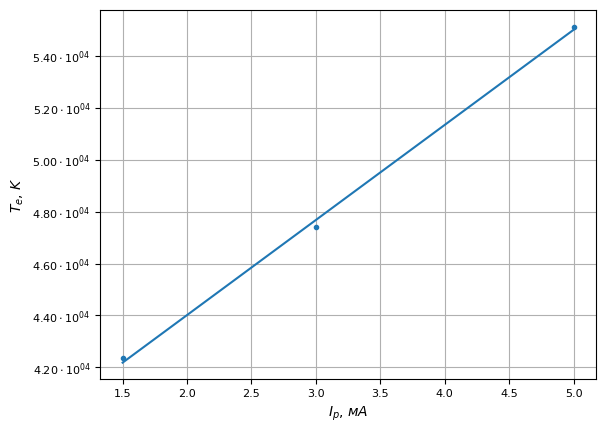

In [115]:
fig = plt.figure()
ax = fig.add_subplot()

mipt.plot(arr_I_p, arr_T_e)

def yfmt(arg, dummy):
    return '${:.2e} }}$'.format(arg).replace('e+', '\cdot 10^{')

# Convert to scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(yfmt))
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

plt.xlabel(r"$I_p$, $мА$")
plt.ylabel(r"$T_e$, $K$")
plt.grid(True)

# plt.legend()
plt.savefig('gen/T_e_I_p.pdf', pad_inches=0.3, bbox_inches='tight')


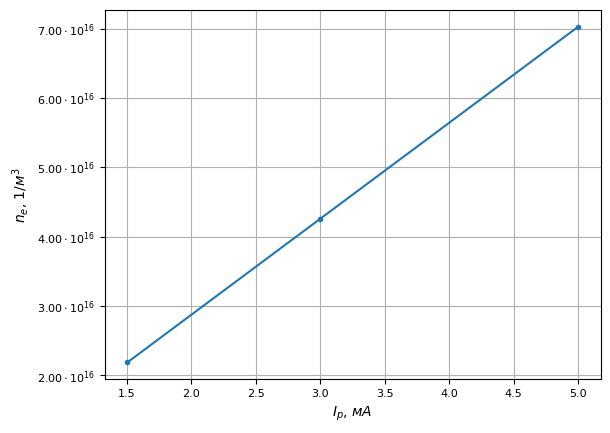

In [116]:
fig = plt.figure()
ax = fig.add_subplot()

mipt.plot(arr_I_p, arr_n_e)

def yfmt(arg, dummy):
    return '${:.2e} }}$'.format(arg).replace('e+', '\cdot 10^{')

# Convert to scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(yfmt))
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

plt.xlabel(r"$I_p$, $мА$")
plt.ylabel(r"$n_e$, $1/м^3$")
plt.grid(True)

# plt.legend()
plt.savefig('gen/n_e_I_p.pdf', pad_inches=0.3, bbox_inches='tight')

In [117]:
print("{:.2e}".format( 25 * 10**-6 / (0.4 * 1.6 * 10**-19 * 0.0002 * 0.0052 * 3.14) * (22 * 1.66 * 10**-27 / (2 * 1.38 * 10**-23 * 40000))**0.5 ))

2.18e+16


In [106]:
setup.S

3.2672556800000003